30. Аппроксимация данных. Солнечная активность
http://www.sidc.be/silso/datafiles

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. Изобразить данные. Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции. Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности. На какой ближайший год придется следующий пик солнечной активности?

Читать по строкам (1900...2015):
  15.7 4.6 8.5 40.8 70.1 105.5 90.1 102.8 80.9
  73.2 30.9 9.5 6.0 2.4 16.1 79.0 95.0 173.6 134.6
  105.7 62.7 43.5 23.7 9.7 27.9 74.0 106.5 114.7
  129.7 108.2 59.4 35.1 18.6 9.2 14.6 60.2 132.8
  190.6 182.6 148.0 113.0 79.2 50.8 27.1 16.1 55.3
  154.3 214.7 193.0 190.7 118.9 98.3 45.0 20.1 6.6
  54.2 200.7 269.3 261.7 225.1 159.0 76.4 53.4
  39.9 15.0 22.0 66.8 132.9 150.0 149.4 148.0 94.4
  97.6 54.1 49.2 22.5 18.4 39.3 131.0 220.1 218.9
  198.9 162.4 91.0 60.5 20.6 14.8 33.9 123.0 211.1
  191.8 203.3 133.0 76.1 44.9 25.1 11.6 28.9 88.3
  136.3 173.9 170.4 163.6 99.3 65.3 45.8 24.7 12.6
  4.2 4.8 24.9 80.8 84.5 94.0 113.3 69.8


In [1]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
values = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6, 105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0, 113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0, 76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9, 198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9, 170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])
years = np.array(range(1900, 2016))
print(years)
print(values)

[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]
[ 15.7   4.6   8.5  40.8  70.1 105.5  90.1 102.8  80.9  73.2  30.9   9.5
   6.    2.4  16.1  79.   95.  173.6 134.6 105.7  62.7  43.5  23.7   9.7
  27.9  74.  106.5 114.7 129.7 108.2  59.4  35.1  18.6   9.2  14.6  60.2
 132.8 190.6 182.6 148.  113.   79.2  50.8  27.1  16.1  55.3 154.3 214.7
 193.  190.7 118.9  98.3  45.   20.1   6.6  54.2 200.7 269.3 261.7 225.1
 159.   76.4  53.4  39.9  15.   22.   66.8 13

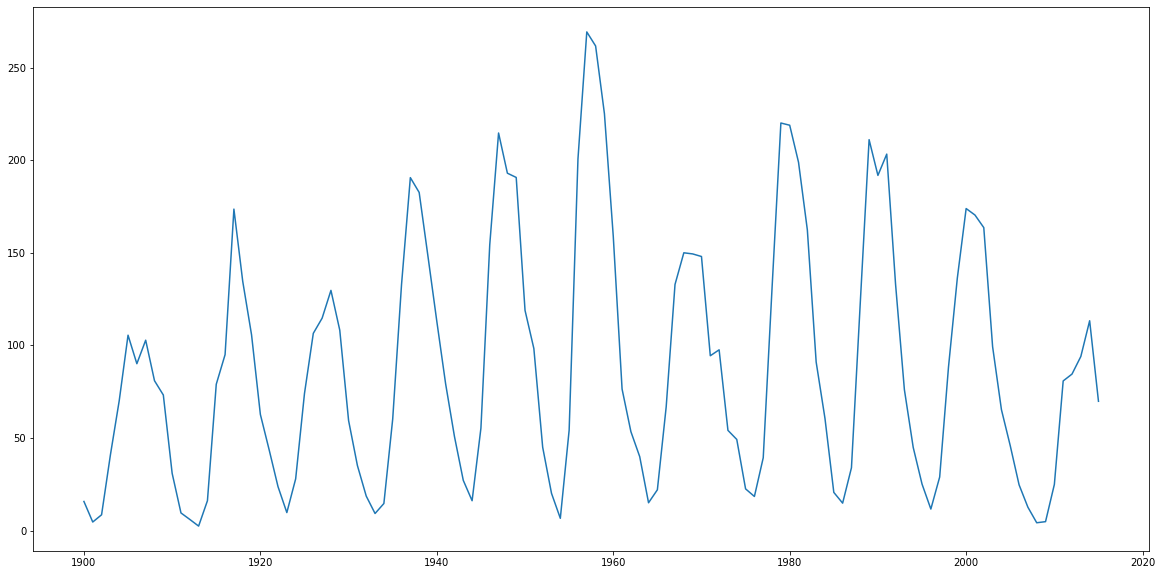

In [3]:
plt.figure(figsize=(20,10))
plt.plot(years, values)
pass

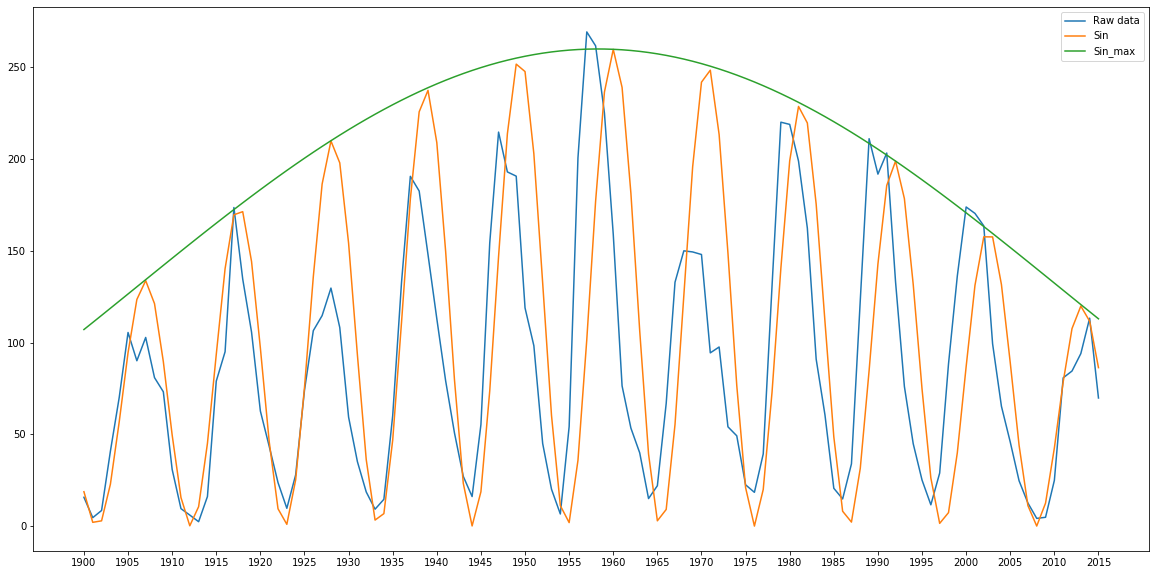

In [4]:
sin_max_value = np.sin(years * 0.03 + np.pi * 1.8) * 130 + 130
sin_value = np.sin(years * 0.59 + np.pi * 0.40) * sin_max_value / 2 + sin_max_value / 2


plt.figure(figsize=(20,10))
plt.plot(years, values, label='Raw data')
plt.plot(years, sin_value, label='Sin')
plt.plot(years, sin_max_value, label='Sin_max')
plt.xticks(years[::5])

plt.legend()
# plt.grid()
pass

In [5]:
mins = {}
maxs = {}

for prev, cur, next, y in zip(values[:-2], values[1:-1], values[2:], years[1:-1]):
    if (cur < next and cur < prev):
        mins[y] = cur
    if (cur > next and cur > prev):
        maxs[y] = cur
print(mins)
print(maxs)

mins_keys = np.array(list(mins.keys()))
mins_values = np.array(list(mins.values()))

maxs_keys = np.array(list(maxs.keys()))
maxs_values = np.array(list(maxs.values()))
                     

{1901: 4.6, 1906: 90.1, 1913: 2.4, 1923: 9.7, 1933: 9.2, 1944: 16.1, 1954: 6.6, 1964: 15.0, 1971: 94.4, 1976: 18.4, 1986: 14.8, 1990: 191.8, 1996: 11.6, 2008: 4.2}
{1905: 105.5, 1907: 102.8, 1917: 173.6, 1928: 129.7, 1937: 190.6, 1947: 214.7, 1957: 269.3, 1968: 150.0, 1972: 97.6, 1979: 220.1, 1989: 211.1, 1991: 203.3, 2000: 173.9, 2014: 113.3}


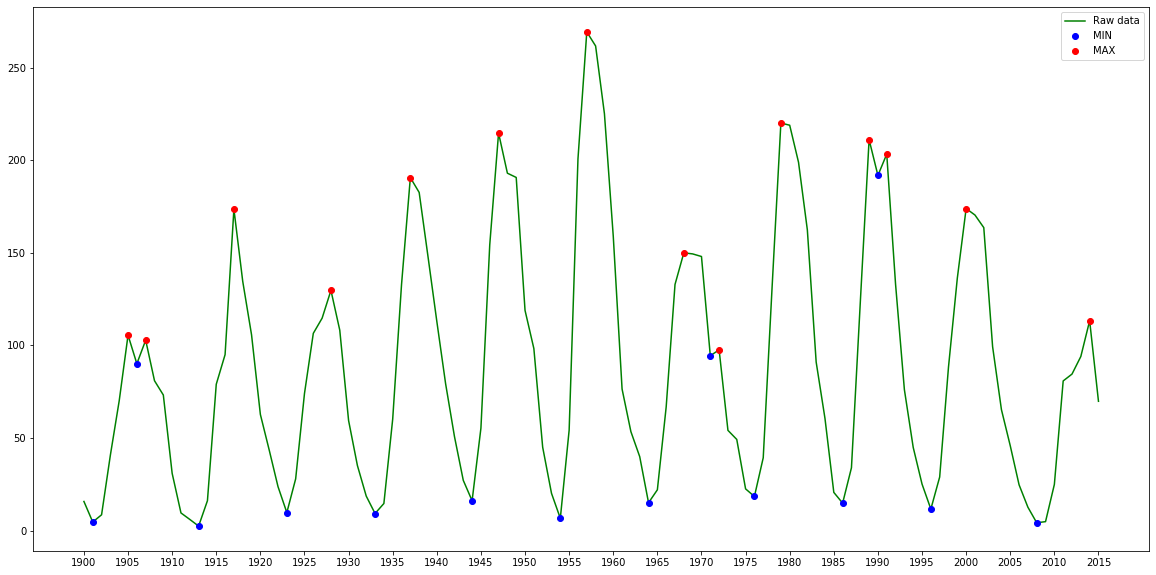

In [6]:
plt.figure(figsize=(20,10))
plt.plot(years, values, 'g', label='Raw data')
plt.plot(mins_keys, mins_values, 'bo', label='MIN')
plt.plot(maxs_keys, maxs_values, 'ro', label='MAX')
plt.xticks(years[::5])
plt.legend()

pass

In [7]:
mins = {}
maxs = {}
last_max = True

for prev, cur, next, y in zip(values[:-2], values[1:-1], values[2:], years[1:-1]):
    if (cur < next and cur < prev and cur < 50 and last_max):
        mins[y] = cur
        last_max = False
    if (cur > next and cur > prev and cur > 50 and not last_max):
        maxs[y] = cur
        last_max = True
print(mins)
print(maxs)

mins_keys = np.array(list(mins.keys()))
mins_values = np.array(list(mins.values()))

maxs_keys = np.array(list(maxs.keys()))
maxs_values = np.array(list(maxs.values()))
                     

{1901: 4.6, 1913: 2.4, 1923: 9.7, 1933: 9.2, 1944: 16.1, 1954: 6.6, 1964: 15.0, 1976: 18.4, 1986: 14.8, 1996: 11.6, 2008: 4.2}
{1905: 105.5, 1917: 173.6, 1928: 129.7, 1937: 190.6, 1947: 214.7, 1957: 269.3, 1968: 150.0, 1979: 220.1, 1989: 211.1, 2000: 173.9, 2014: 113.3}


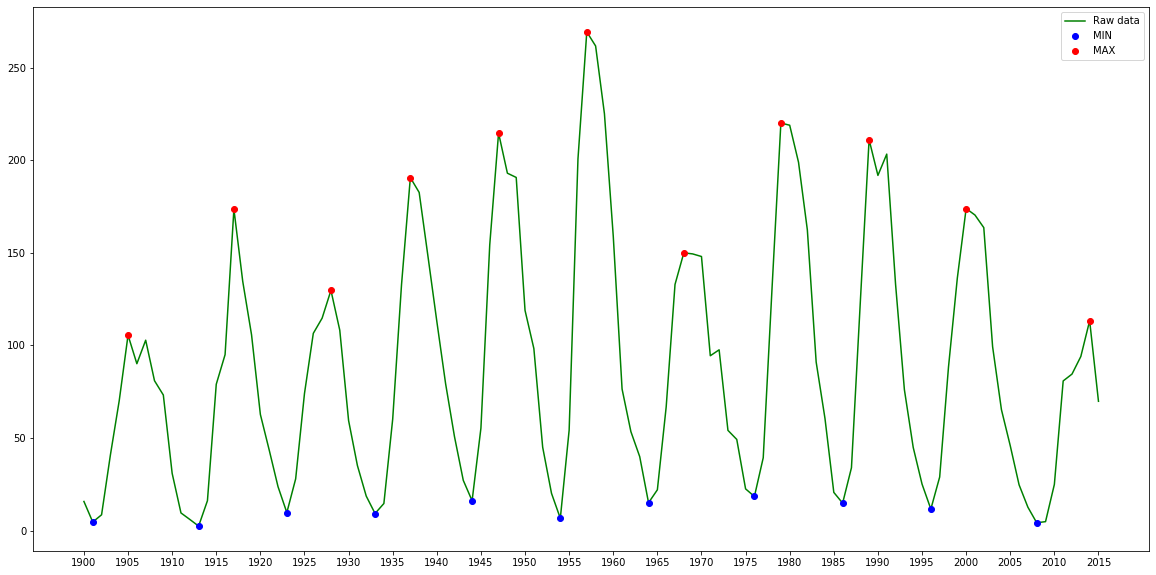

In [8]:
plt.figure(figsize=(20,10))
plt.plot(years, values, 'g', label='Raw data')
plt.plot(mins_keys, mins_values, 'bo', label='MIN')
plt.plot(maxs_keys, maxs_values, 'ro', label='MAX')
plt.xticks(years[::5])
plt.legend()

pass

10.7


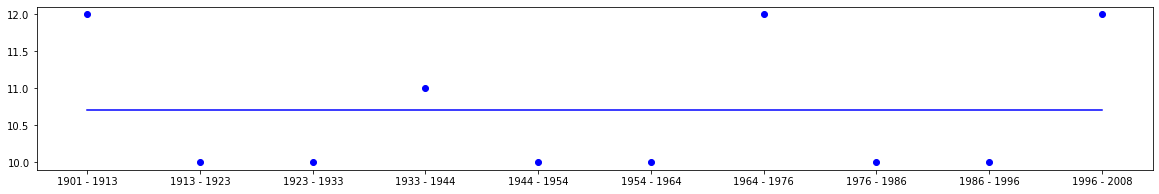

In [33]:
mins_datas_sub = [str(f) + " - " + str(s) for f, s in zip(mins_keys[:-1], mins_keys[1:])]
mins_value_sub = mins_keys[1:] - mins_keys[:-1]

plt.figure(figsize=(20,3))

plt.plot(range(len(mins_value_sub)), mins_value_sub, 'bo')
plt.plot((0, len(mins_value_sub) - 1), (np.average(mins_value_sub), np.average(mins_value_sub)), 
         'b', label="Среднее взвешенное")

plt.xticks(range(len(mins_datas_sub)), mins_datas_sub)
pass
print(np.average(mins_value_sub))

10.9


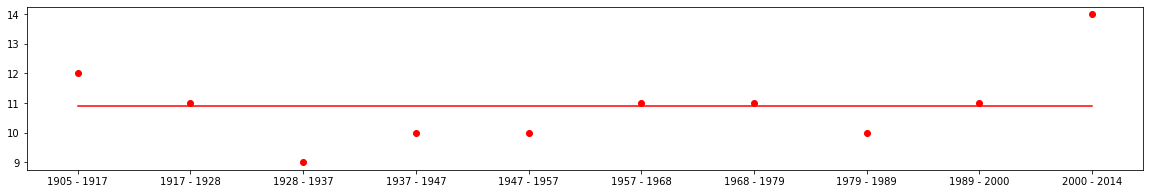

In [34]:
maxs_datas_sub = [str(f) + " - " + str(s) for f, s in zip(maxs_keys[:-1], maxs_keys[1:])]
maxs_value_sub = maxs_keys[1:] - maxs_keys[:-1]

plt.figure(figsize=(20,3))

plt.plot(range(len(maxs_value_sub)), maxs_value_sub, 'ro')
plt.plot((0, len(maxs_value_sub) - 1), (np.average(maxs_value_sub), np.average(maxs_value_sub)), 
         'r', label="Среднее взвешенное")

plt.xticks(range(len(maxs_datas_sub)), maxs_datas_sub)
pass
print(np.average(maxs_value_sub))